## Create new `simulation` window

In [3]:
import mujoco
import mujoco_viewer

model = mujoco.MjModel.from_xml_path('../asset/ur5e/ril_robot.xml')
data = mujoco.MjData(model)

# create the viewer object
viewer = mujoco_viewer.MujocoViewer(model, data)

# simulate and render
for _ in range(100000):
    mujoco.mj_step(model, data)
    viewer.render()
    if not viewer.is_alive:
        break

# close
viewer.close()


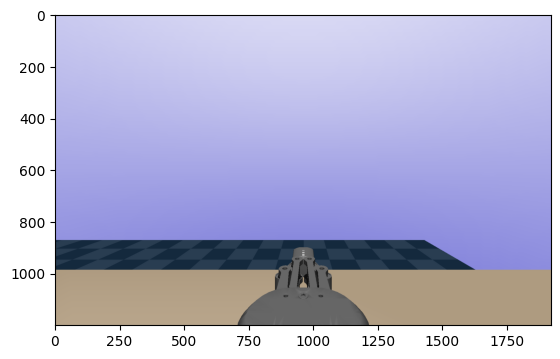

In [1]:
import mujoco
import mujoco_viewer

import matplotlib.pyplot as plt

model = mujoco.MjModel.from_xml_path('../asset/ur5e/ril_robot.xml')
data = mujoco.MjData(model)

viewer = mujoco_viewer.MujocoViewer(model, data, 'offscreen')
mujoco.mj_forward(model, data)
img = viewer.read_pixels(camid=1)


plt.imshow(img)
plt.show()


In [2]:
import numpy as np

imgs = []
# Grab image
img = np.zeros((viewer.viewport.height,viewer.viewport.width,3),dtype=np.uint8)
img_depth = np.zeros((viewer.viewport.height,viewer.viewport.width,1),dtype=np.uint8)

mujoco.mjr_render(viewer.viewport, viewer.scn, viewer.ctx)
mujoco.mjr_readPixels(img, img_depth, viewer.viewport, viewer.ctx) # this makes a little delay
img = np.flipud(img) # flip image
imgs.append(img)


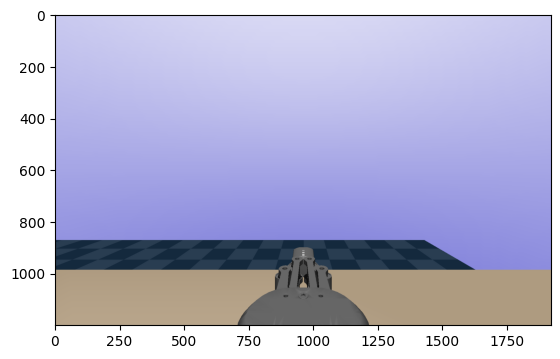

In [3]:
plt.imshow(imgs[0])
plt.show()

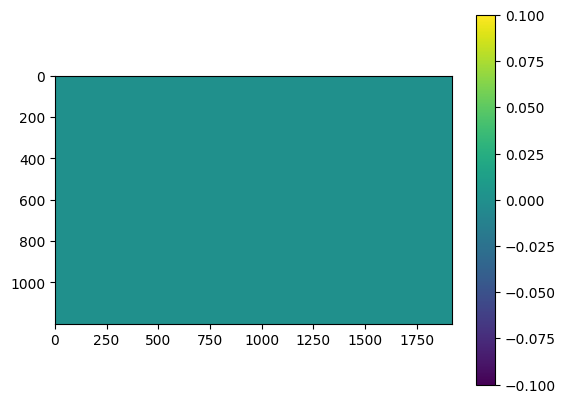

In [5]:
plt.imshow(img_depth)
plt.colorbar()
plt.show()

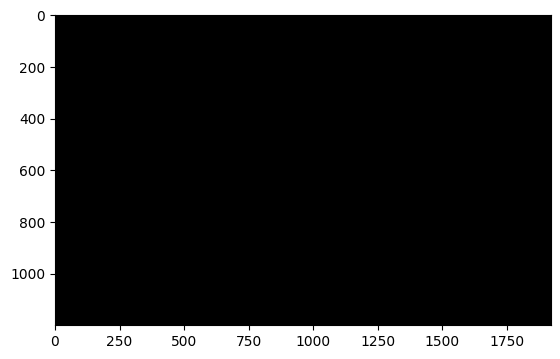

In [6]:
import mujoco
import mujoco_viewer
import matplotlib.pyplot as plt

model = mujoco.MjModel.from_xml_path('../asset/ur5e/ril_robot.xml')
data = mujoco.MjData(model)
viewer = mujoco_viewer.MujocoViewer(model, data, 'offscreen')
mujoco.mj_step(model, data)
img = viewer.read_pixels(camid=1)

plt.imshow(img)
plt.show()


In [ ]:
 self.context = mujoco.MjrContext(self.model, mujoco.mjtFontScale.mjFONTSCALE_100)
mujoco.mjr_render(self.viewport, self.scene, self.context)
upside_down_image = np.empty((self.image_height, self.image_width, 3), dtype=np.uint8)
upside_down_depth = np.empty((self.image_height, self.image_width, 1))
mujoco.mjr_readPixels(rgb=upside_down_image, depth=upside_down_depth, viewport=self.viewport, con=self.context)